# AMAZON BESTSELLING BOOKS ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid') #background -> whitegrid

import string
import re

In [2]:
df = pd.read_csv('bestsellers with categories.csv')

In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


## Data Preparation

In [4]:
df.rename(columns = {"User Rating": "User_Rating"}, inplace = True)

In [5]:
df['Name_Len'] = df['Name'].apply(lambda x: len(x) - x.count(" "))
# subtract whitespaces

In [6]:
df.head()

,Name,Author,User_Rating,Reviews,Price,Year,Genre,Name_Len
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,26
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,15
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,32
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,20
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,59


In [7]:
punctuations = string.punctuation

**string.punctuation** is a pre-initialized string used as string constant. It gives all sets of punctuation.

In [8]:
print('List of punctuations: ', punctuations)

List of punctuations:  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [9]:
#Percentage of punctuations:
def count_punc(text):
    count = sum(1 for char in text if char in punctuations)
    return round(count/(len(text) - text.count(" "))*100, 3)

In [10]:
df['Punc%'] = df['Name'].apply(lambda x: count_punc(x))

In [11]:
df.head()

,Name,Author,User_Rating,Reviews,Price,Year,Genre,Name_Len,Punc%
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,26,3.846
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,15,20.000
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,32,3.125
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,20,10.000
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,59,10.169


## Data Visualization

Text(0.5, 0.98, 'Distribution of Genre for all unique books from 2009 to 2019')

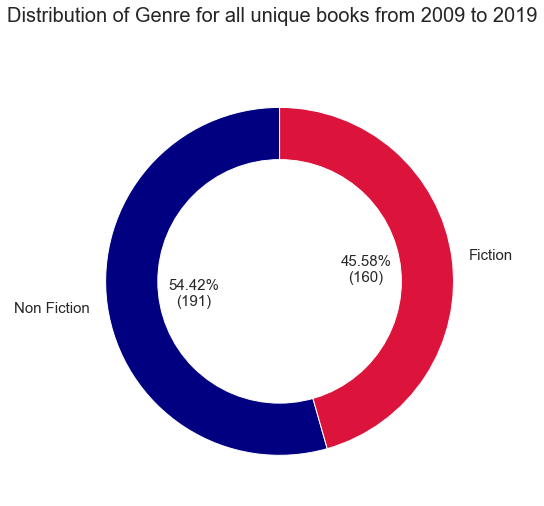

In [12]:
no_dup = df.drop_duplicates('Name') #drop duplicate books
g_count = no_dup['Genre'].value_counts() #count genres

fig, ax = plt.subplots(figsize=(8, 8))

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

genre_col = ['navy','crimson'] #colors

center_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(x=g_count.values, labels=g_count.index, autopct=make_autopct(g_count.values), 
          startangle=90, textprops={'size': 15}, pctdistance=0.5, colors=genre_col)
ax.add_artist(center_circle)

fig.suptitle('Distribution of Genre for all unique books from 2009 to 2019', fontsize=20)

The **Axes.pie() function** in axes module of matplotlib library is used to plot a pie char
- x: This parameter is the wedge sizes.
- explode: This parameter is the is a len(x) array which specifies the fraction of the radius with which to offset each wedge.
- autopct: This parameter is a string or function used to label the wedges with their numeric value.
- colors: This parameter is the sequence of matplotlib color args through which the pie chart will cycle.
- label: This parameter is the sequence of strings providing the labels for each wedge.
- pctdistance: This parameter is the ratio between the center of each pie slice and the start of the text generated by autopct.
- shadow: This parameter is the used to draw a shadow beneath the pie.
- labeldistance: This parameter is the radial distance at which the pie labels are drawn.
- startangle: This parameter is used to rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
- radius: This parameter is the radius of the pie.
- counterclock: This parameter specifies fractions direction, clockwise or counterclockwise.
- wedgeprops: This parameter is dict of arguments passed to the wedge objects making the pie.
- textprops: This parameter is dict of arguments to pass to the text objects.
- center: This parameter is the Center position of the chart.
- frame: This parameter is used to plot axes frame with the chart if true.
- rotatelabels: This parameter is used to rotate each label to the angle of the corresponding slice if true.

Returns: This returns the following:

- patches: This returns the sequence of matplotlib.patches.Wedge instances.
- texts: This returns the list of the label matplotlib.text.Text instances.
- autotexts: This returns the list of Text instances for the numeric labels.


### Visualize the insights year-wise:

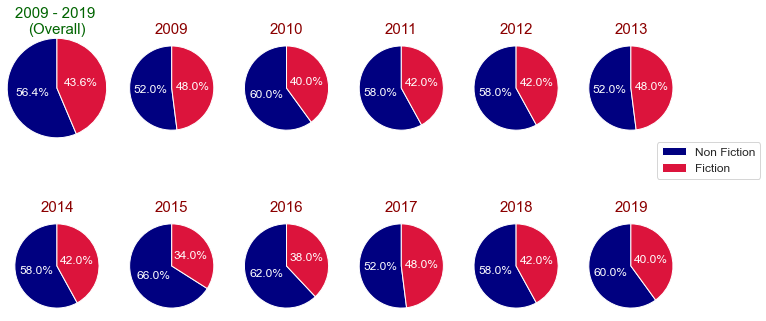

In [13]:
y1 = np.arange(2009, 2014)
y2 = np.arange(2014, 2020)
g_count = df['Genre'].value_counts()

fig, ax = plt.subplots(2, 6, figsize = (12, 6))

ax[0, 0].pie(x = g_count.values, labels = None, autopct = '%1.1f%%',
            startangle = 90, textprops = {'size': 12, 'color': 'white'},
            pctdistance = 0.5, radius = 1.3, colors = genre_col)
ax[0, 0].set_title('2009 - 2019 \n(Overall)', color = 'darkgreen', fontdict={'fontsize': 15}) 

for i, year in enumerate(y1):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[0, i+1].set_title(year, color = 'darkred', fontdict = {'fontsize': 15})
    ax[0, i+1].pie(x = counts.values, labels = None, autopct = '%1.1f%%',
                  startangle = 90, textprops = {'size': 12, 'color': 'white'},
                  pctdistance = 0.5, colors = genre_col, radius = 1.1)

for i, year in enumerate(y2):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[1, i].set_title(year, color = 'darkred', fontdict = {'fontsize': 15})
    ax[1, i].pie(x = counts.values, labels = None, autopct = '%1.1f%%',
                  startangle = 90, textprops = {'size': 12, 'color': 'white'},
                  pctdistance = 0.5, colors = genre_col, radius = 1.1)
    
fig.legend(g_count.index, loc='center right', fontsize=12)

## Top 10 bestselling authors of both fiction & non-fiction categories:

C:\Users\kushw\AppData\Local\Temp\ipykernel_13124\3512116673.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(best_nf_authors.index, fontsize = 12, fontweight = 'semibold')
C:\Users\kushw\AppData\Local\Temp\ipykernel_13124\3512116673.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(best_f_authors.index, fontsize = 12, fontweight = 'semibold')


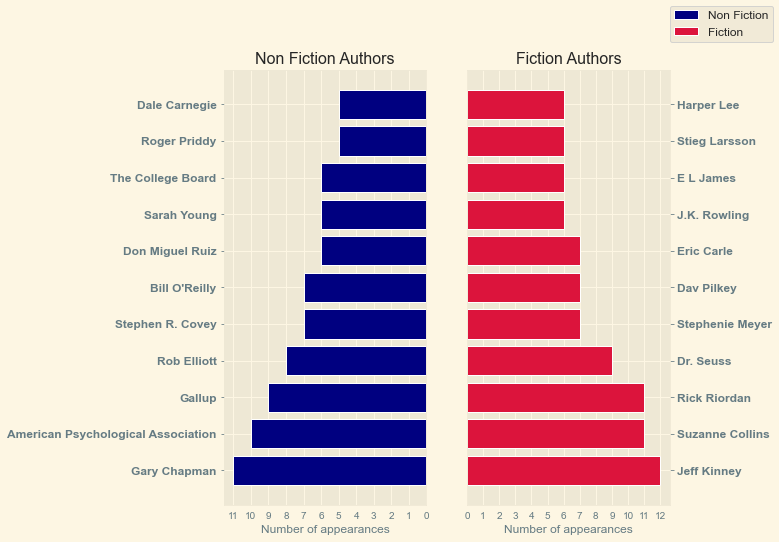

In [14]:
best_nf_authors = df.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Non Fiction'].sort_values(ascending = False)[:11]
best_f_authors = df.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Fiction'].sort_values(ascending = False)[:11]

with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(1, 2, figsize = (8,8))
    
    ax[0].barh(y = best_nf_authors.index, width = best_nf_authors.values, color = genre_col[0])
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_left()
    ax[0].set_xticks(np.arange(max(best_nf_authors.values)+1))
    ax[0].set_yticklabels(best_nf_authors.index, fontsize = 12, fontweight = 'semibold')
    ax[0].set_xlabel('Number of appearances')
    ax[0].set_title('Non Fiction Authors')
    
    ax[1].barh(y = best_f_authors.index, width = best_f_authors.values, color = genre_col[1])
    ax[1].yaxis.tick_right()
    ax[1].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[1].set_yticklabels(best_f_authors.index, fontsize = 12, fontweight = 'semibold')
    ax[1].set_xlabel('Number of appearances')
    ax[1].set_title('Fiction Authors')
    
    fig.legend(['Non Fiction', 'Fiction'], fontsize=12)
    
plt.show()

## Unique Books and Overall Reviews

C:\Users\kushw\AppData\Local\Temp\ipykernel_13124\1707696237.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(top_authors.index, fontweight='semibold')


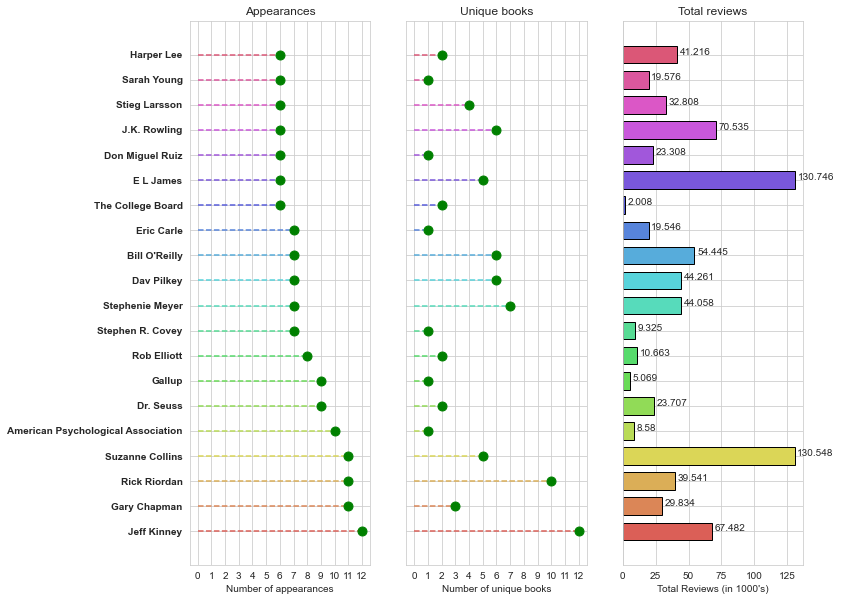

In [15]:
n_best = 20

top_authors = df.Author.value_counts().nlargest(n_best)
no_dup = df.drop_duplicates('Name')

fig, ax = plt.subplots(1, 3, figsize = (11, 10), sharey = True)

color = sns.color_palette("hls", n_best)

ax[0].hlines(y = top_authors.index, xmin = 0, xmax = top_authors.values, color = color, linestyles = 'dashed')
ax[0].plot(top_authors.values, top_authors.index, 'go', markersize = 9)
ax[0].set_xlabel('Number of appearances')
ax[0].set_xticks(np.arange(top_authors.values.max()+1))
ax[0].set_yticklabels(top_authors.index, fontweight='semibold')
ax[0].set_title('Appearances')

book_count = []
total_reviews = []

for name, col in zip(top_authors.index, color):
    book_count.append(len(no_dup[no_dup.Author == name]['Name']))
    total_reviews.append(no_dup[no_dup.Author == name]['Reviews'].sum()/1000)

ax[1].hlines(y = top_authors.index, xmin = 0, xmax = book_count, color = color, linestyles = 'dashed')
ax[1].plot(book_count, top_authors.index, 'go', markersize = 9)
ax[1].set_xlabel('Number of unique books')
ax[1].set_xticks(np.arange(max(book_count)+1))
ax[1].set_title('Unique books')

ax[2].barh(y = top_authors.index, width = total_reviews, color = color, edgecolor = 'black', height = 0.7)

for name, val in zip(top_authors.index, total_reviews):
    ax[2].text(val+2, name, val)

ax[2].set_xlabel("Total Reviews (in 1000's)")
ax[2].set_title('Total reviews')

plt.show()

## Conclusion:

**Author Jeff Kinney is the best-selling author with 12 appearances in best-selling books from 2009 to 2019. This is how we can analyze any data related to sales consisting of different categories.**